In [47]:
import os, glob, re, pandas as pd, simplejson as json
%matplotlib inline

In [2]:
hosts = os.listdir('cli-stats')

In [85]:
host2log = {host: [] for host in hosts}
for host in hosts:
    for path in glob.glob('cli-stats/' + host + '/*.log'):
        with open(path) as f:
            host2log[host].append(f.read().strip())
host2log = {host: '\n'.join(logs) for host, logs in host2log.items()}

In [86]:
pat = re.compile(r'^(\d+): (\d+): (.+)$', re.MULTILINE)
client2ip = {}
def gen():
    rtts = []
    diffs = []
    for host, log in host2log.items():
        for m in pat.finditer(log):
            time, client, data = m.groups()
            time = int(time)
            client = int(client)
            data = json.loads(data)
            if 'ip' in data:
                client2ip[client] = data['ip']
            if 'rtts' in data:
                for rtt in data['rtts']:
                    rtts.append((host, time, client, client2ip[client], rtt))
                for diff in data['bcastDiffs']['worst']:
                    diffs.append((host, time, client, client2ip[client], diff))
    return rtts, diffs
rtts, diffs = gen()
rtts = pd.DataFrame(rtts, columns=['host','time','client','ip','rtt'])
diffs = pd.DataFrame(diffs, columns=['host','time','client','ip','diff'])

In [87]:
rtts.groupby('client').apply(lambda x: x.iloc[20:])

host           time   client              ip  rtt
client                                                                
1446    40     stomped.io  1514240344705     1446  67.180.198.106   23
        41     stomped.io  1514240344705     1446  67.180.198.106   27
        42     stomped.io  1514240344705     1446  67.180.198.106   26
        43     stomped.io  1514240344705     1446  67.180.198.106   21
        44     stomped.io  1514240344705     1446  67.180.198.106   21
1454    45     stomped.io  1514240346258     1454  67.183.127.190   44
        46     stomped.io  1514240346258     1454  67.183.127.190   56
        47     stomped.io  1514240346258     1454  67.183.127.190   38
        48     stomped.io  1514240346258     1454  67.183.127.190   46
        49     stomped.io  1514240346258     1454  67.183.127.190   39
        50     stomped.io  1514240351261     1454  67.183.127.190   50
        51     stomped.io  1514240351261     1454  67.183.127.190   40
        52     stomped.io  1514240351261     1454  67.183.127.190   43
        53     stomped.io  1514240351261     1454  67.183.127.190   44
        54     stomped.io  1514240351261     1454  67.183.127.190   44
        55     stomped.io  1514240356256     1454  67.183.127.190   52
        56     stomped.io  1514240356256     1454  67.183.127.190   40
        57     stomped.io  1514240356256     1454  67.183.127.190   66
        58     stomped.io  1514240356256     1454  67.183.127.190   55
        59     stomped.io  1514240356256     1454  67.183.127.190   41
        60     stomped.io  1514240361273     1454  67.183.127.190   73
        61     stomped.io  1514240361273     1454  67.183.127.190   64
        62     stomped.io  1514240361273     1454  67.183.127.190   50
        63     stomped.io  1514240361273     1454  67.183.127.190   45
        64     stomped.io  1514240361273     1454  67.183.127.190   47
        69     stomped.io  1514240366262     1454  67.183.127.190   67
        70     stomped.io  1514240366262     1454  67.183.127.190   40
        71     stomped.io  1514240366262     1454  67.183.127.190   43
        72     stomped.io  1514240366262     1454  67.183.127.190   40
        73     stomped.io  1514240366262     1454  67.183.127.190   50
...                   ...            ...      ...             ...  ...
2141453 83710  stomped.io  1514261409340  2141453     74.45.32.33   52
        83711  stomped.io  1514261409340  2141453     74.45.32.33   79
2143591 83507  stomped.io  1514261358641  2143591     64.30.94.96  115
        83508  stomped.io  1514261358641  2143591     64.30.94.96  121
        83509  stomped.io  1514261358641  2143591     64.30.94.96   96
        83510  stomped.io  1514261358641  2143591     64.30.94.96  101
        83526  stomped.io  1514261363656  2143591     64.30.94.96  113
        83527  stomped.io  1514261363656  2143591     64.30.94.96   96
        83528  stomped.io  1514261363656  2143591     64.30.94.96   99
        83529  stomped.io  1514261363656  2143591     64.30.94.96  101
        83530  stomped.io  1514261363656  2143591     64.30.94.96  106
        83546  stomped.io  1514261368636  2143591     64.30.94.96  131
        83547  stomped.io  1514261368636  2143591     64.30.94.96   85
        83548  stomped.io  1514261368636  2143591     64.30.94.96   99
        83549  stomped.io  1514261368636  2143591     64.30.94.96  113
        83550  stomped.io  1514261368636  2143591     64.30.94.96   99
2148997 83716  stomped.io  1514261413643  2148997     64.30.94.96   92
        83717  stomped.io  1514261413643  2148997     64.30.94.96  124
        83718  stomped.io  1514261413643  2148997     64.30.94.96   92
        83719  stomped.io  1514261413643  2148997     64.30.94.96  125
        83735  stomped.io  1514261418657  2148997     64.30.94.96  149
        83736  stomped.io  1514261418657  2148997     64.30.94.96  133
        83737  stomped.io  1514261418657  2148997     64.30.94.96  132
        83738  stomped.io  1514261418657  214

# RTTs
## Means

/Users/yang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'client' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b512150>]], dtype=object)

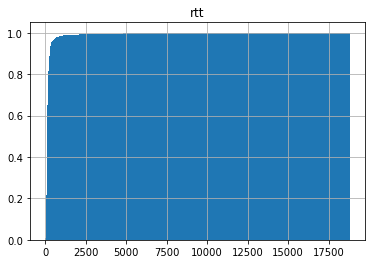

In [88]:
(
    rtts
        .groupby('client')
        .apply(lambda x: x.iloc[20:])
        .groupby('client')
        .agg({'rtt': 'mean'})
        .sort_values('rtt')
        .hist(cumulative=True,normed=True,bins=1000)
)

/Users/yang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'client' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14d22c710>]], dtype=object)

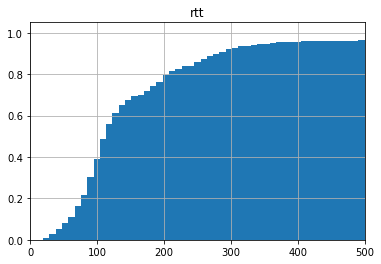

In [102]:
plot = (
    rtts
        .groupby('client')
        .apply(lambda x: x.iloc[20:])
        .groupby('client')
        .agg({'rtt': 'mean'})
        .sort_values('rtt')
        .hist(cumulative=True,normed=True,bins=2000)
)
plot[0][0].set_xlim((0,500))
plot

## Maxes

/Users/yang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'client' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133283b50>]], dtype=object)

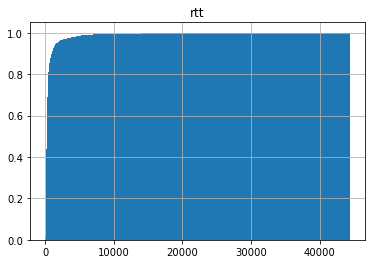

In [92]:
(
    rtts
        .groupby('client')
        .apply(lambda x: x.iloc[20:])
        .groupby('client')
        .agg({'rtt': 'max'})
        .sort_values('rtt')
        .hist(cumulative=True,normed=True,bins=1000)
)

/Users/yang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'client' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14a3689d0>]], dtype=object)

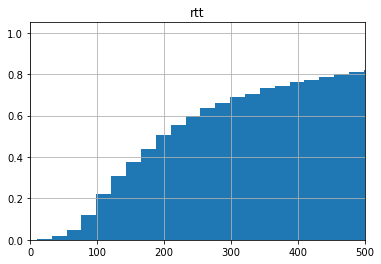

In [100]:
plot = (
    rtts
        .groupby('client')
        .apply(lambda x: x.iloc[20:])
        .groupby('client')
        .agg({'rtt': 'max'})
        .sort_values('rtt')
        .hist(cumulative=True,normed=True,bins=2000)
)
plot[0][0].set_xlim((0,500))
plot

# Time between bcasts
## Means of worst k

/Users/yang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'client' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1313fc9d0>]], dtype=object)

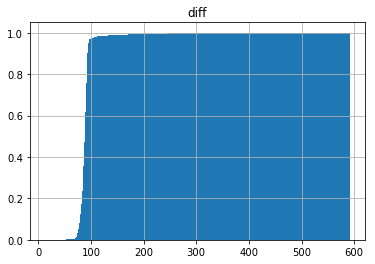

In [90]:
(
    diffs
        .groupby('client')
        .apply(lambda x: x.iloc[20:])
        .groupby('client')
        .agg({'diff': 'mean'})
        .sort_values('diff')
        .hist(cumulative=True,normed=True,bins=1000)
)

/Users/yang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'client' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14cc37190>]], dtype=object)

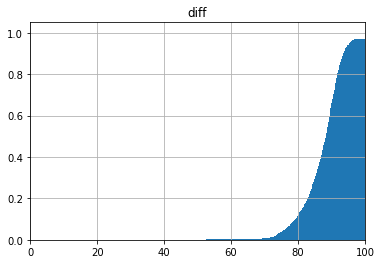

In [103]:
plot = (
    diffs
        .groupby('client')
        .apply(lambda x: x.iloc[20:])
        .groupby('client')
        .agg({'diff': 'mean'})
        .sort_values('diff')
        .hist(cumulative=True,normed=True,bins=2000)
)
plot[0][0].set_xlim((0,100))
plot

## Maxes

/Users/yang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'client' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124659910>]], dtype=object)

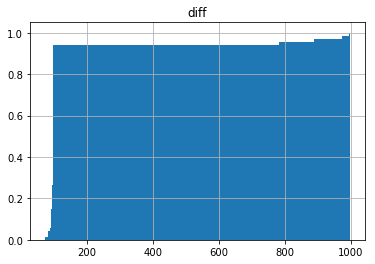

In [81]:
(
    diffs
        .groupby('client')
        .apply(lambda x: x.iloc[20:])
        .groupby('client')
        .agg({'diff': 'max'})
        .sort_values('diff')
        .hist(cumulative=True,normed=True,bins=1000)
)

/Users/yang/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 'client' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  """


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14d180650>]], dtype=object)

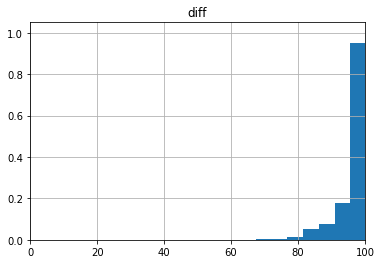

In [104]:
plot = (
    diffs
        .groupby('client')
        .apply(lambda x: x.iloc[20:])
        .groupby('client')
        .agg({'diff': 'max'})
        .sort_values('diff')
        .hist(cumulative=True,normed=True,bins=2000)
)
plot[0][0].set_xlim((0,100))
plot